# Taller

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, morphology

## Border

Aplica algoritmos de detección de bordes, el resultado esperado es el siguiente:
<br>
- La imagen original
- Una imagen con sólo los bordes de la greita (no tiene que ser perfecto).
- Una imagen que haga suma de la original con los bordes.

<img src= "res/punto1.jpg">

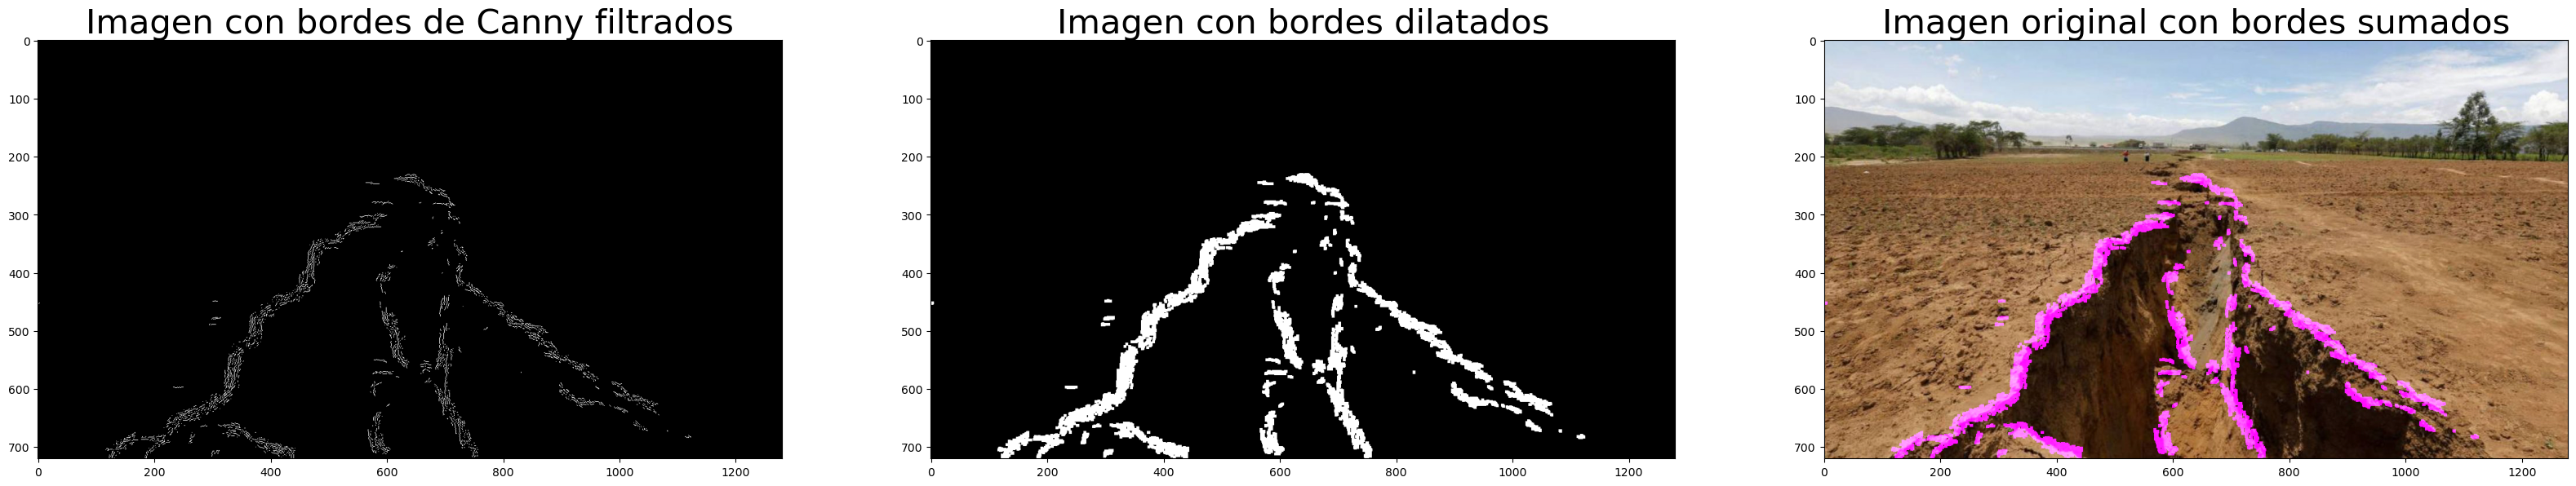

In [2]:
img = cv2.cvtColor(cv2.imread('res/punto1.jpg'), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Para detectar estos bordes vamos aplicar un filtro gaussiano primero para mitigar el ruido de la tierra
mean_img = cv2.blur(img_gray,(31,31))
# Y ahora uno de media para eliminar saltos demasiado significativos que compliquen la selección de bordes
work_img = cv2.medianBlur(mean_img, 9)

# Aplicamos ahora Canny
canny_img = cv2.Canny(work_img, 22, 25)
# Limpiamos fondo paisaje
canny_img[:230,:canny_img.shape[1]] = 0
# Dilatación
new_img = cv2.dilate(canny_img, np.ones((3,3)), iterations=2)

fig, axes = plt.subplots(1,3, figsize = (40,40))

# Sumamos para resltar los bordes
img[:,:,0] = cv2.add(img[:,:,0],new_img)
img[:,:,2] = cv2.add(img[:,:,2],new_img)
axes[0].imshow(canny_img,  cmap='gray')
axes[0].set_title('Imagen con bordes de Canny filtrados', fontsize= 30)
axes[1].imshow(new_img, cmap='gray')
axes[1].set_title('Imagen con bordes dilatados', fontsize= 30)
axes[2].imshow(img)
axes[2].set_title('Imagen original con bordes sumados', fontsize= 30);

## Segmentación

Aplique algoritmos de segmentación capaces de identificar el objeto de interés

<img src= "res/punto2.jpg">

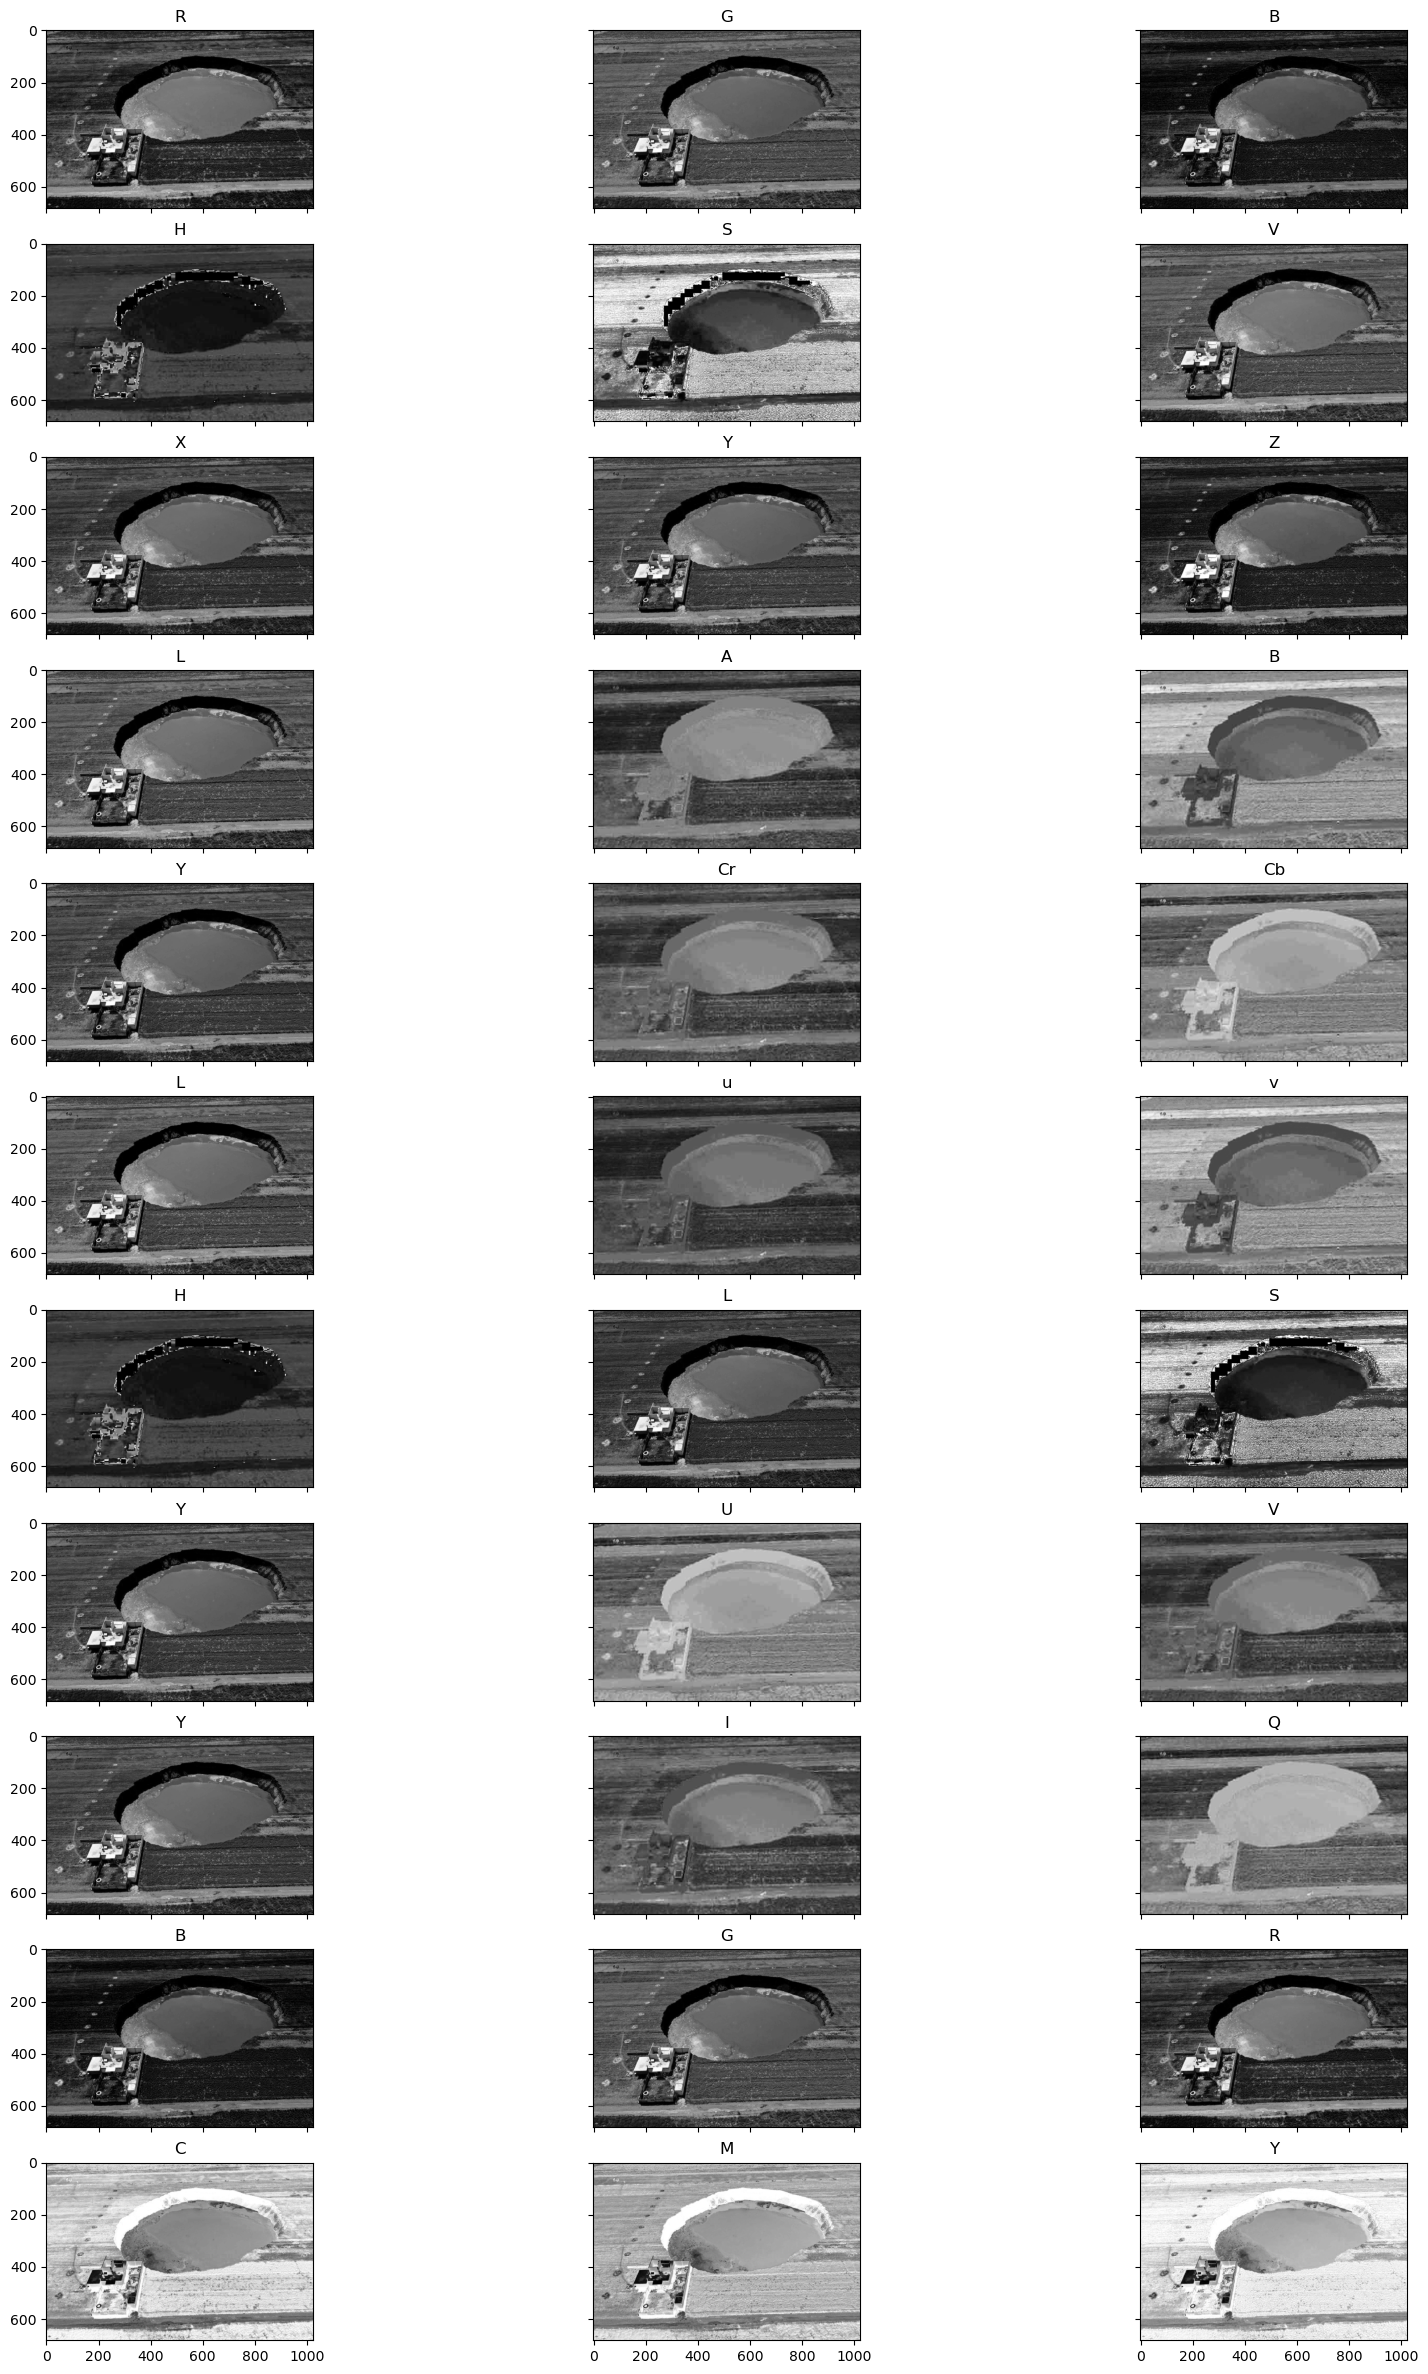

In [3]:
img = cv2.imread('res/punto2.jpg',cv2.IMREAD_COLOR)
# Img rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Img hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Img XYZ
img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
# Img LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# Img YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# Img Luv
img_luv = cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
# Img HLS
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# Img YUV
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
# Img YIQ
img_Y = 0.299*img_rgb[:,:,0] + 0.587*img_rgb[:,:,1] + 0.114*img_rgb[:,:,2]
img_I = 0.596*img_rgb[:,:,0] - 0.275*img_rgb[:,:,1] - 0.321*img_rgb[:,:,2]
img_Q = 0.212*img_rgb[:,:,0]- 0.523*img_rgb[:,:,1] + 0.311*img_rgb[:,:,2]
# Concatenamos los canales       
img_yiq = np.dstack((img_Y, img_I, img_Q))     
# Img CMY
img_cmy = np.dstack((255-img_rgb[:,:,0], 255-img_rgb[:,:,1], 255-img_rgb[:,:,2]))

fig, axs = plt.subplots(11, 3, figsize=(20, 30), sharex=True, sharey=True)
# RGB
axs[0, 0].imshow(img_rgb[:,:,0], cmap="gray")
axs[0, 0].set_title("R")
axs[0, 1].imshow(img_rgb[:,:,1], cmap="gray")
axs[0, 1].set_title("G")
axs[0, 2].imshow(img_rgb[:,:,2], cmap="gray")
axs[0, 2].set_title("B")

# HSV
axs[1, 0].imshow(img_hsv[:,:,0], cmap="gray")
axs[1, 0].set_title("H")
axs[1, 1].imshow(img_hsv[:,:,1], cmap="gray")
axs[1, 1].set_title("S")
axs[1, 2].imshow(img_hsv[:,:,2], cmap="gray")
axs[1, 2].set_title("V")

# XYZ
axs[2, 0].imshow(img_xyz[:,:,0], cmap="gray")
axs[2, 0].set_title("X")
axs[2, 1].imshow(img_xyz[:,:,1], cmap="gray")
axs[2, 1].set_title("Y")
axs[2, 2].imshow(img_xyz[:,:,2], cmap="gray")
axs[2, 2].set_title("Z")

# LAB
axs[3, 0].imshow(img_lab[:,:,0], cmap="gray")
axs[3, 0].set_title("L")
axs[3, 1].imshow(img_lab[:,:,1], cmap="gray")
axs[3, 1].set_title("A")
axs[3, 2].imshow(img_lab[:,:,2], cmap="gray")
axs[3, 2].set_title("B")

# YCrCb
axs[4, 0].imshow(img_ycrcb[:,:,0], cmap="gray")
axs[4, 0].set_title("Y")
axs[4, 1].imshow(img_ycrcb[:,:,1], cmap="gray")
axs[4, 1].set_title("Cr")
axs[4, 2].imshow(img_ycrcb[:,:,2], cmap="gray")
axs[4, 2].set_title("Cb")

# Luv
axs[5, 0].imshow(img_luv[:,:,0], cmap="gray")
axs[5, 0].set_title("L")
axs[5, 1].imshow(img_luv[:,:,1], cmap="gray")
axs[5, 1].set_title("u")
axs[5, 2].imshow(img_luv[:,:,2], cmap="gray")
axs[5, 2].set_title("v")

# HLS
axs[6, 0].imshow(img_hls[:,:,0], cmap="gray")
axs[6, 0].set_title("H")
axs[6, 1].imshow(img_hls[:,:,1], cmap="gray")
axs[6, 1].set_title("L")
axs[6, 2].imshow(img_hls[:,:,2], cmap="gray")
axs[6, 2].set_title("S")

# YUV
axs[7, 0].imshow(img_yuv[:,:,0], cmap="gray")
axs[7, 0].set_title("Y")
axs[7, 1].imshow(img_yuv[:,:,1], cmap="gray")
axs[7, 1].set_title("U")
axs[7, 2].imshow(img_yuv[:,:,2], cmap="gray")
axs[7, 2].set_title("V")

# YIQ
axs[8, 0].imshow(img_yiq[:,:,0], cmap="gray")
axs[8, 0].set_title("Y")
axs[8, 1].imshow(img_yiq[:,:,1], cmap="gray")
axs[8, 1].set_title("I")
axs[8, 2].imshow(img_yiq[:,:,2], cmap="gray")
axs[8, 2].set_title("Q");

# BGR
axs[9, 0].imshow(img[:,:,0], cmap="gray")
axs[9, 0].set_title("B")
axs[9, 1].imshow(img[:,:,1], cmap="gray")
axs[9, 1].set_title("G")
axs[9, 2].imshow(img[:,:,2], cmap="gray")
axs[9, 2].set_title("R")

# CMY
axs[10, 0].imshow(img_cmy[:,:,0], cmap="gray")
axs[10, 0].set_title("C")
axs[10, 1].imshow(img_cmy[:,:,1], cmap="gray")
axs[10, 1].set_title("M")
axs[10, 2].imshow(img_cmy[:,:,2], cmap="gray")
axs[10, 2].set_title("Y");

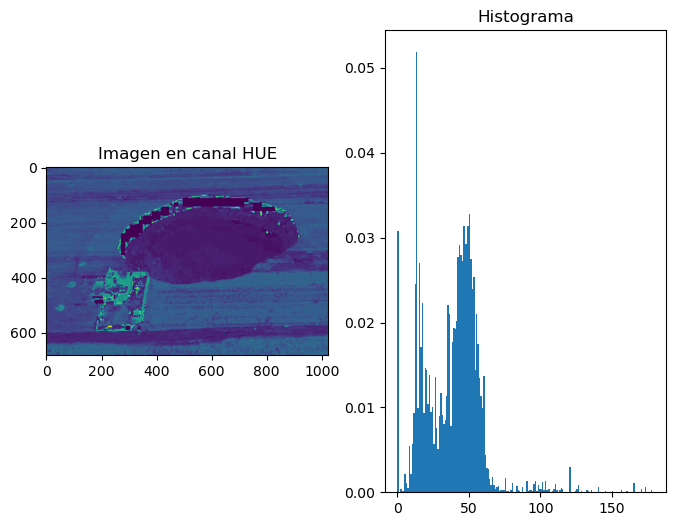

In [4]:
hue = img_hsv[:,:,0]
fig, (axe1 , axe2) = plt.subplots(1,2, figsize = (8,6))
axe1.imshow(hue);
axe1.set_title('Imagen en canal HUE')
axe2.hist(hue.ravel(), bins = np.max(hue)-np.min(hue), density='true')
axe2.set_title('Histograma');

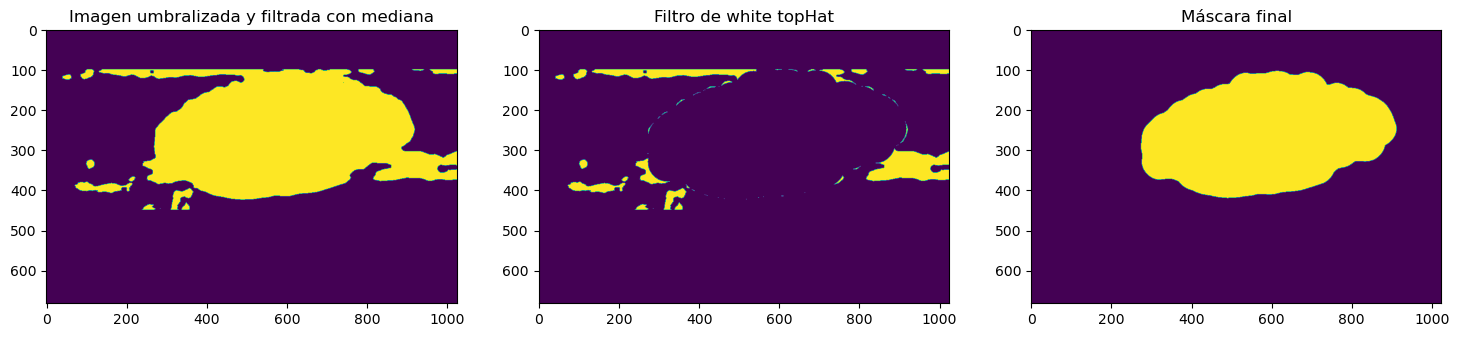

In [5]:
# Aplicamos umbral de Otsu
thr, out = cv2.threshold(hue,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# Filtro de mediana para limpiar un poco
out = cv2.medianBlur(out, 21)
# Cortamos manualmente unas zonas para ahorrar cómputo
out[:100,:] = 0
out[450:,:] = 0
# Estructura y filtro topHat
footprint = morphology.disk(48)
res = morphology.white_tophat(out,footprint=footprint)
# Extracción del filtro en la imagen de Otsu
mask = cv2.subtract(out,res)
# Erosión para pulir
kernel = np.ones((5,5),np.uint8)
mask = cv2.erode(mask,kernel,iterations = 2)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (18,8))
ax1.imshow(out)
ax1.set_title('Imagen umbralizada y filtrada con mediana')
ax2.imshow(res)
ax2.set_title('Filtro de white topHat')
ax3.imshow(mask)
ax3.set_title('Máscara final');

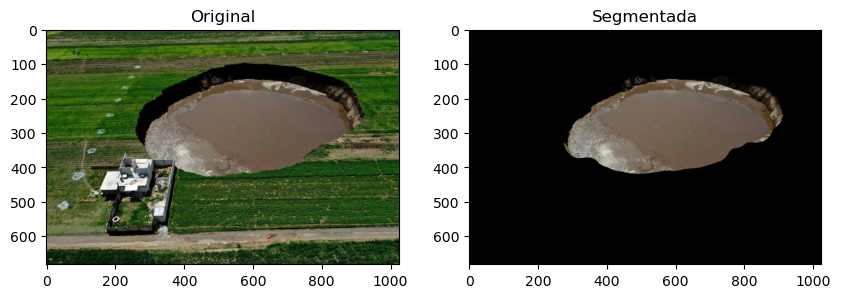

In [6]:
# Finalmente, segmentamos el lago usando una operación binaria
final_img = cv2.bitwise_and(img_rgb, img_rgb, mask = mask)
fig, (g1,g2) = plt.subplots(1,2,figsize = (10,8))
g1.imshow(img_rgb)
g1.set_title('Original')
g2.imshow(final_img)
g2.set_title('Segmentada');